<a href="https://colab.research.google.com/github/mchecanu/Bayesan_model_selection/blob/main/Polynomial_fitter_Bayesan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebok to perform polynomial fittings using Bayesan inference **

Necessary imports and installs

In [ ]:
!pip install pymc

import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import aesara.tensor as at
import matplotlib.pyplot as plt
import seaborn as sbs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We define the different functions (linear, parabolic and cubic)

In [ ]:
def linear_equation(x, *params):
  a1,b1 = params
  linear_function=(a1 * x ) + b1  
  return linear_function

def parab_equation(x, *params):
  a2,b2,c2 = params
  parabolic_function=(a2 * (x**2) ) + (b2 * x ) + c2
  return parabolic_function

def cubic_equation(x, *params):
  a3,b3,c3,d3 = params
  cubic_function=(a3 * (x**3) ) + (b3 * (x**2) ) + (c3 * (x)) + d3
  return cubic_function

We generate some test data

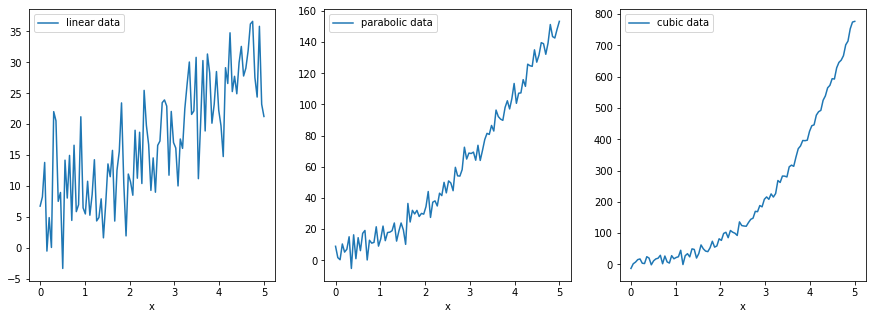

In [ ]:
num_pts = 100
x_vec = np.linspace(0, 5, num_pts)

a=5
b=5
c=5
d=5

ymeas_lin = linear_equation(x_vec, *[a, b]) + 5*np.random.normal(size=len(x_vec))
ymeas_par = parab_equation(x_vec, *[a, b, c]) + 5*np.random.normal(size=len(x_vec))
ymeas_cub = cubic_equation(x_vec, *[a, b, c, d]) + 10*np.random.normal(size=len(x_vec))

fig, axes = plt.subplots(nrows=1,ncols=3, figsize = (15,5))
axes[0].plot(x_vec, ymeas_lin,label='linear data')
axes[0].set_xlabel('x')
axes[0].legend()
axes[1].plot(x_vec, ymeas_par,label='parabolic data')
axes[1].set_xlabel('x')
axes[1].legend()
axes[2].plot(x_vec, ymeas_cub, label='cubic data')
axes[2].set_xlabel('x')
axes[2].legend()

Now lets make the Bayesan fitting of the linear data with the linear model and plot it

/usr/local/lib/python3.7/dist-packages/pymc/step_methods/metropolis.py:289: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/usr/local/lib/python3.7/dist-packages/pymc/step_methods/metropolis.py:289: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/usr/local/lib/python3.7/dist-packages/pymc/step_methods/metropolis.py:289: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


/usr/local/lib/python3.7/dist-packages/pymc/step_methods/metropolis.py:289: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


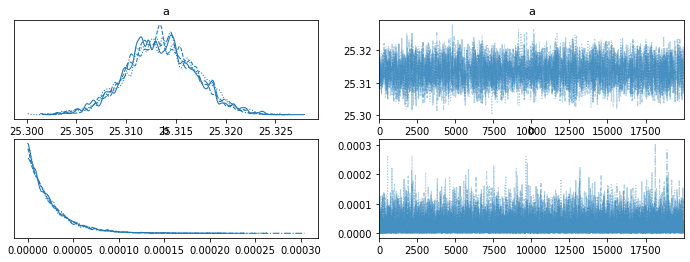

In [ ]:
#Let's fit the linear data this with pymc3
#Now let's try and see if we can use pymc3 for this

with pm.Model() as model_1:
  
  a = pm.Uniform('a',0,100) #we use a uniform distribution for our prior
  b = pm.Uniform('b',0,100)

  inferred_y = a*x_vec+b #we define the function

  kcal = pm.Normal('y_data', mu=inferred_y, sigma=0.1, observed=np.abs(ymeas_par)) #here we are assuming the var of the data to be 0.1

  #you can play wiht that

  trace_1 = pm.sample(20000, step = pm.Metropolis(), cores = 4)
  pm.plot_trace(trace_1);

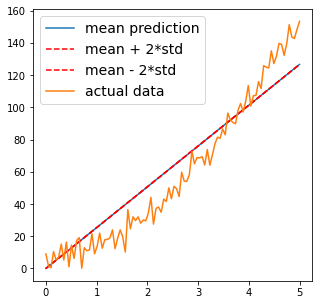

In [ ]:
#get the posterior samples
burn_frac = 0.10
burn_frac_idx = int(len(trace_1.posterior.a.values[0,:])*burn_frac)

amat = trace_1.posterior.a.values.ravel()[burn_frac_idx:]
bmat = trace_1.posterior.b.values.ravel()[burn_frac_idx:]

#calculate the mean prediction
linear_pred = linear_equation(x_vec, *[np.mean(amat), np.mean(bmat)])

#calculate a bunch of predictions
all_sho_preds = []
for aval, bval in zip (amat, bmat):
  all_sho_preds.append(linear_equation(x_vec, *[aval, bval]))
  
#and then use it to compute the mean and variance
all_sho_preds = np.array(all_sho_preds)
all_sho_preds.shape
mean_sho_pred = np.abs(all_sho_preds).mean(axis=0)
std_sho_pred = np.abs(all_sho_preds).std(axis=0)

fig, axes = plt.subplots(figsize = (5,5))
axes.plot(x_vec, mean_sho_pred, label = 'mean prediction')
axes.plot(x_vec, mean_sho_pred+2*std_sho_pred, 'r--', label = 'mean + 2*std')
axes.plot(x_vec, mean_sho_pred-2*std_sho_pred, 'r--',label = 'mean - 2*std')
axes.plot(x_vec, np.abs(ymeas_par), label = 'actual data')

plt.legend(fontsize = 14)

Now lets make the Bayesan fitting of the linear data with the paraolic model and plot it

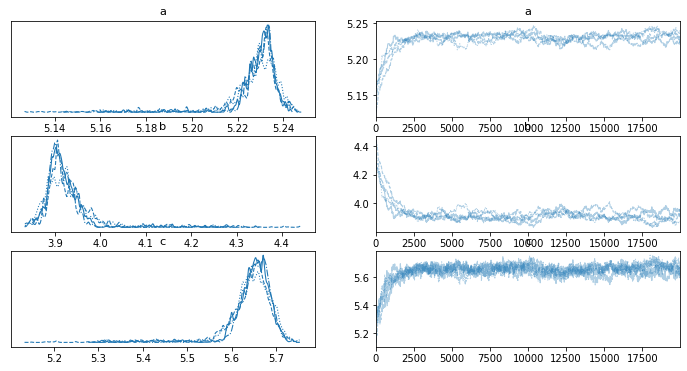

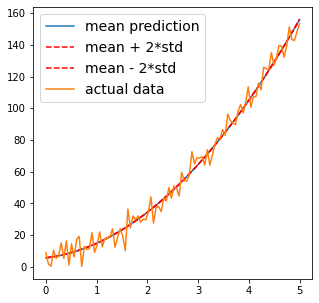

In [ ]:
#Let's fit the linear data this with pymc3
#Now let's try and see if we can use pymc3 for this

with pm.Model() as model_2:
  
  a = pm.Uniform('a',0,10) #we use a uniform distribution for our prior
  b = pm.Uniform('b',0,10)
  c = pm.Uniform('c',0,10) 

  inferred_y = a*x_vec**2+b*x_vec+c #we define the function

  kcal = pm.Normal('y_data', mu=inferred_y, sigma=0.1, observed=np.abs(ymeas_par)) #here we are assuming the var of the data to be 0.1

  #you can play wiht that

  trace_2 = pm.sample(20000, step = pm.Metropolis(), cores = 4)
  pm.plot_trace(trace_2);

#get the posterior samples
burn_frac = 0.10
burn_frac_idx = int(len(trace_2.posterior.a.values[0,:])*burn_frac)

amat = trace_2.posterior.a.values.ravel()[burn_frac_idx:]
bmat = trace_2.posterior.b.values.ravel()[burn_frac_idx:]
cmat = trace_2.posterior.c.values.ravel()[burn_frac_idx:]

#calculate the mean prediction
par_pred = parab_equation(x_vec, *[np.mean(amat), np.mean(bmat), np.mean(cmat)])

#calculate a bunch of predictions
all_sho_preds = []
for aval, bval, cval in zip (amat, bmat, cmat):
  all_sho_preds.append(parab_equation(x_vec, *[aval, bval, cval]))
  
#and then use it to compute the mean and variance
all_sho_preds = np.array(all_sho_preds)
all_sho_preds.shape
mean_sho_pred = np.abs(all_sho_preds).mean(axis=0)
std_sho_pred = np.abs(all_sho_preds).std(axis=0)

fig, axes = plt.subplots(figsize = (5,5))
axes.plot(x_vec, mean_sho_pred, label = 'mean prediction')
axes.plot(x_vec, mean_sho_pred+2*std_sho_pred, 'r--', label = 'mean + 2*std')
axes.plot(x_vec, mean_sho_pred-2*std_sho_pred, 'r--',label = 'mean - 2*std')
axes.plot(x_vec, np.abs(ymeas_par), label = 'actual data')

plt.legend(fontsize = 14)

Now lets make the Bayesan fitting of the linear data with the cubic model and plot it

/usr/local/lib/python3.7/dist-packages/pymc/step_methods/metropolis.py:289: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/usr/local/lib/python3.7/dist-packages/pymc/step_methods/metropolis.py:289: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/usr/local/lib/python3.7/dist-packages/pymc/step_methods/metropolis.py:289: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


/usr/local/lib/python3.7/dist-packages/pymc/step_methods/metropolis.py:289: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


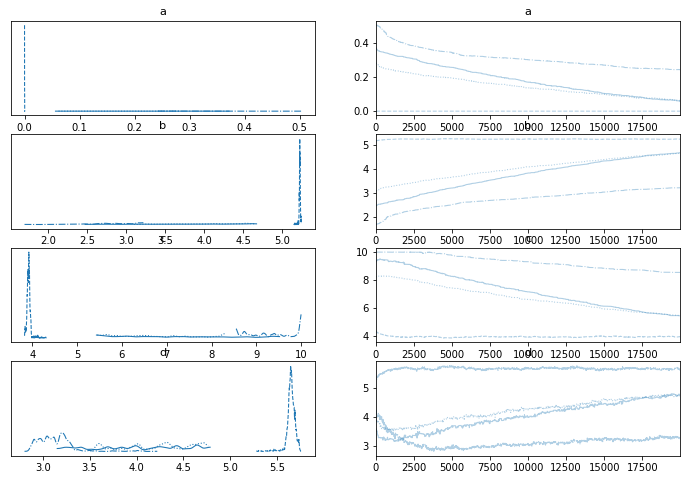

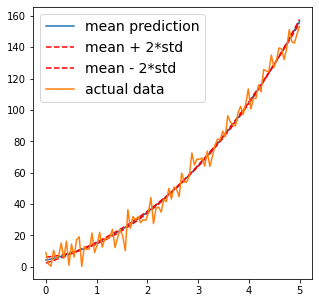

In [ ]:
#Let's fit the linear data this with pymc3
#Now let's try and see if we can use pymc3 for this

with pm.Model() as model_3:
  
  a = pm.Uniform('a',0,10) #we use a uniform distribution for our prior
  b = pm.Uniform('b',0,10)
  c = pm.Uniform('c',0,10) 
  d = pm.Uniform('d',0,10) 

  inferred_y = a*x_vec**3+b*x_vec**2+c*x_vec+d #we define the function

  kcal = pm.Normal('y_data', mu=inferred_y, sigma=0.1, observed=np.abs(ymeas_par)) #here we are assuming the var of the data to be 0.1

  #you can play wiht that

  trace_3 = pm.sample(20000, step = pm.Metropolis(), cores = 4)
  pm.plot_trace(trace_3);

#get the posterior samples
burn_frac = 0.10
burn_frac_idx = int(len(trace_3.posterior.a.values[0,:])*burn_frac)

amat = trace_3.posterior.a.values.ravel()[burn_frac_idx:]
bmat = trace_3.posterior.b.values.ravel()[burn_frac_idx:]
cmat = trace_3.posterior.c.values.ravel()[burn_frac_idx:]
dmat = trace_3.posterior.d.values.ravel()[burn_frac_idx:]

#calculate the mean prediction
cub_pred = cubic_equation(x_vec, *[np.mean(amat), np.mean(bmat), np.mean(cmat), np.mean(dmat)])

#calculate a bunch of predictions
all_sho_preds = []
for aval, bval, cval, dval in zip (amat, bmat, cmat, dmat):
  all_sho_preds.append(cubic_equation(x_vec, *[aval, bval, cval, dval]))
  
#and then use it to compute the mean and variance
all_sho_preds = np.array(all_sho_preds)
all_sho_preds.shape
mean_sho_pred = np.abs(all_sho_preds).mean(axis=0)
std_sho_pred = np.abs(all_sho_preds).std(axis=0)

fig, axes = plt.subplots(figsize = (5,5))
axes.plot(x_vec, mean_sho_pred, label = 'mean prediction')
axes.plot(x_vec, mean_sho_pred+2*std_sho_pred, 'r--', label = 'mean + 2*std')
axes.plot(x_vec, mean_sho_pred-2*std_sho_pred, 'r--',label = 'mean - 2*std')
axes.plot(x_vec, np.abs(ymeas_par), label = 'actual data')

plt.legend(fontsize = 14)

Comparision of the 3 models on fitting the linear data

In [ ]:
model_dict = {'Linear':trace_1, 'Parabolic': trace_2, 'Cubic': trace_3}
comp = pm.compare(model_dict, method='BB-pseudo-BMA')
comp

/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1048: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:813: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1048: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.e

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Parabolic,0,-136031.875210,9800.194530,0.000000,1.0,20081.695352,0.000000,True,log
Cubic,1,-174356.236053,65309.166600,38324.360844,0.0,98376.707780,5284.755021,True,log
Linear,2,-950615.710564,7245.917242,814583.835355,0.0,17511.490879,94706.865871,True,log


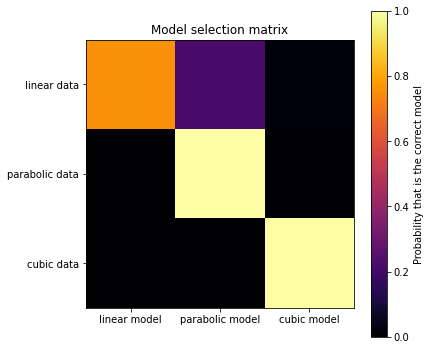

In [ ]:
#Here i am going to plot the matrix of the model selection

model_sel_mat = [[0.757,0.215,0.02],[0,1,0],[0,0,1]]
y_labels= ['linear data', 'parabolic data', 'cubic data']
x_labels= ['linear model', 'parabolic model', 'cubic model']

fig, axes = plt.subplots(figsize = (6,6))

im = axes.imshow(model_sel_mat, cmap='inferno')
axes.set_xticks([0, 1, 2])
axes.set_yticks([0, 1, 2])
axes.set_yticklabels(y_labels)
axes.set_xticklabels(x_labels)
fig.colorbar(im,label='Probability that is the correct model')
plt.title('Model selection matrix')
plt.show()